# Monte Carlo simulation

ASSIGNMENT:
Use Monte Carlo to price an ATM binary call option.

With Geometric Brownian Motion formula to simulate the daily stock price movement over a 1 year period. 10,000 paths.

Use numpy array for the paths and *VECTORIZATION*, to increase speed of calculation.
(It can be implemented with pandas DataFrame as well, but the calculation time is considerable higher).

Finally, Visualise the paths.

*Note:* Assuming 250 business days a year.

**GBM formula:** Spot(t+dt) = Spot * (1 + ( mu * dt ) + ( vol * sqrt(dt) * normsinv(rand()) ) )

In [4]:
# Import needed libraries

import math
from scipy.stats import norm
import numpy as np
import random
from datetime import datetime

In [44]:
# Define Market data variables and values

Spot = 100 # Spot price
mu = 0.05 # rate of growth
vol = 0.2
Term = 1
T_steps = 250
Strike= 100 # Strike price

In [49]:
# a seed can be fixed to replicate the same result: np.random.seed(24)

dt = Term / T_steps
paths = 10000

# mc_paths = np.zeros([ T_steps +1 , paths])
mc_paths = np.zeros([ T_steps +1 , paths])
mc_paths[0, :] = Spot

# create an array of randon numbers
Z_array = np.random.standard_normal(size=(T_steps , paths))

# precalculate:
# mu * dt
mu_x_dt = mu * dt
# vol * math.sqrt(dt)
vol_x_sqrt_dt = vol * math.sqrt(dt)


# get start datetime
start_time = datetime.now()

# VECTORIZATION: let's apply the 
for step in range( 1, T_steps+1 ):
    mc_paths[ step , : ] = mc_paths[ step-1, : ] * (1 + (mu_x_dt) + ( vol_x_sqrt_dt * Z_array[ step-1, : ] )   )

        

# get start datetime
end_time = datetime.now()

# calculate simulation processing time
time = end_time-start_time
print('Processing time for', paths, ':', time)

Processing time for 10000 : 0:00:00.015958


**LESS THAN 1 SECOND FOR 10,000 PATHS!!**

(it took 10 secs approx without vectorization)

In [39]:
# Use last price of each path to calculate the payoff
# Then, calculate binary price as average of payoffs

last_prices = np.array(mc_paths[-1, : ])

bin_call_mc = sum( last_prices > Strike ) / paths

print('The binary call price with Monte Carlo is:', bin_call_mc)

The binary call price with Monte Carlo is: 0.5683


Let's compare it with the closed form,
using the option_pricer library (check Black-Scholes folder for library details)


In [1]:
import option_pricer as op

In [33]:
bin_price_bs = op.option_pricer(Spot=100,
                                K_strike=100, rf_rate=0.05, vol=0.2,
                                Term=1, product = 'binary', opt_type = 'call')[0]

print('The binary call price with Black-Scholes is:', bin_price_bs)

The binary call price with Black-Scholes is: 0.5323


The Monte Carlo pricing of 0.5683 is quite close to the Black-Scholes price of 0.5323.

# Path visualization

Let's plot the paths with matplotlib

In [40]:
# plt scenarios

%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True) 

<IPython.core.display.Javascript object>


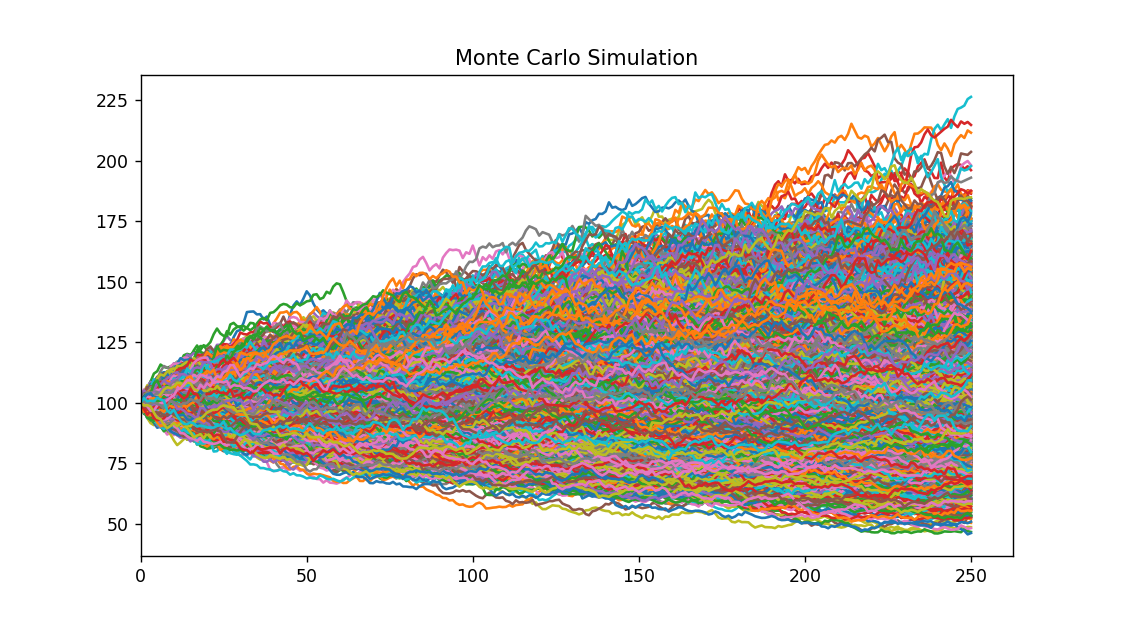

(0.0, 262.5)

In [41]:
# Plot MC paths

fig1 = plt.figure(figsize = [9, 5] )
plt.title('Monte Carlo Simulation')
plt.plot(mc_paths[:, :])
plt.xlim(xmin=0)